In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

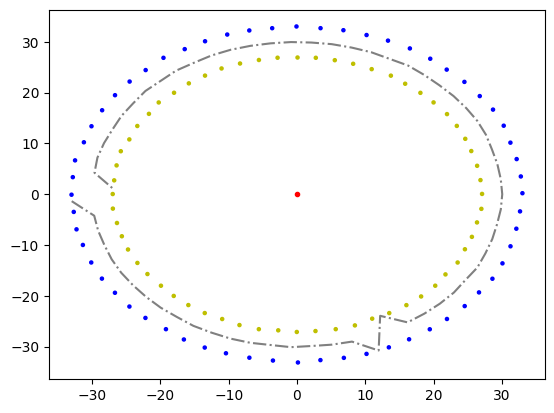

In [5]:
#Method by r,theta and rounding off to 1 decimal place.

cones = pd.read_csv("cones.csv")  #file ko read kara
colors = ['y' if c=='yellow' else 'b' for c in cones['color'] ]  #ek if else use kara taaki ham colors accordingly set kar sake
plt.scatter(cones.x, cones.y ,color=colors, s=5)


#finding centre
x_centre = cones['x'].mean()
y_centre = cones['y'].mean()
plt.plot(x_centre, y_centre,'o',color='r', ms=3)

#shifting origin
cones['x_shift'] = cones['x'] - x_centre
cones['y_shift'] = cones['y'] - y_centre

#calculating r,theta
cones['r'] = np.sqrt(cones['x_shift']**2 + cones['y_shift']**2)
cones['theta'] = np.arctan2(cones.y_shift , cones.x_shift)

#round_off
cones['theta_rounded'] = cones.theta.round(decimals=1)


ideal_line = cones.groupby('theta_rounded').r.mean().reset_index()  #agar index reset kardo, toh ye ek dataframe ban jata

#converting back to x,y coordinates
mean_x = ideal_line.r * np.cos(ideal_line.theta_rounded) + x_centre
mean_y = ideal_line.r * np.sin(ideal_line.theta_rounded) + y_centre

plt.plot(mean_x,mean_y,'-.',color = 'grey')
plt.show()





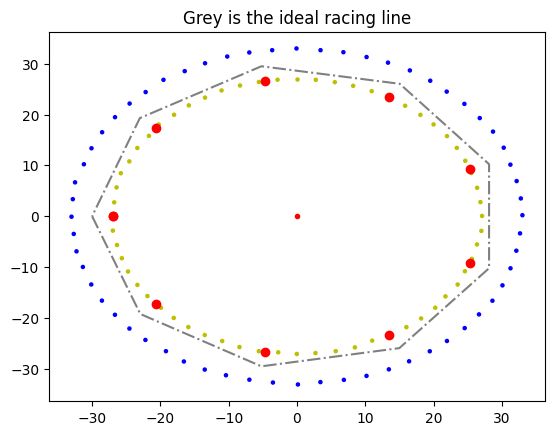

In [ ]:
#By using the linspace and interpolation method

cones = pd.read_csv("cones.csv")  #file ko read kara
colors = ['y' if c=='yellow' else 'b' for c in cones['color'] ]  #ek if else use kara taaki ham colors accordingly set kar sake
plt.scatter(cones.x, cones.y ,color=colors, s=5)


#finding centre
x_centre = cones['x'].mean()
y_centre = cones['y'].mean()
plt.plot(x_centre, y_centre,'o',color='r', ms=3)

#shifting origin
cones['x_shift'] = cones['x'] - x_centre
cones['y_shift'] = cones['y'] - y_centre

#calculating r,theta
cones['r'] = np.sqrt(cones['x_shift']**2 + cones['y_shift']**2)
cones['theta'] = np.arctan2(cones.y_shift , cones.x_shift)

# distinguishing acc to color
yellow = cones[cones.color == 'yellow']
blue = cones[cones.color == 'blue']
yellow = yellow.sort_values('theta')
blue = blue.sort_values('theta')

#create a linspace -- -pi se +pi tak 50 points equal angle pe bnata hai
smooth_thetas = np.linspace(-np.pi,np.pi,10) 

#interpolate the number of theta points
r_yellow_interp = np.interp(smooth_thetas,yellow.theta,yellow.r,period=2*np.pi)
r_blue_interp = np.interp(smooth_thetas,blue.theta,blue.r,period=2*np.pi)

#mean
r_mean = (r_yellow_interp + r_blue_interp)/2


#converting back to x,y coordinates
mean_x = r_mean * np.cos(smooth_thetas) + x_centre
mean_y = r_mean * np.sin(smooth_thetas) + y_centre

plt.plot(mean_x,mean_y,'-.',color = 'grey')
plt.title("Grey is the ideal racing line")
plt.show()



